In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib as plt

In [2]:
# Importação do banco de dados CSV
dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")

C:\Users\Usuário\AppData\Local\Temp\ipykernel_9064\3544363823.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")


In [3]:
# Listagem das colunas para consulta
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708357 entries, 0 to 1708356
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacionalidade  object 
 14  es

In [4]:
# Seleção das colunas a serem analisadas neste projeto
dados = dados.loc[:, ['paciente_idade','paciente_enumSexoBiologico','paciente_racaCor_valor','paciente_endereco_nmMunicipio','vacina_categoria_nome','vacina_fabricante_nome','vacina_dataAplicacao','vacina_descricao_dose']]

# Filtro a partir da 1ª dose
dados_2 = dados.loc[(dados['vacina_descricao_dose'] == '2ª Dose') | (dados['vacina_descricao_dose'] == '2ª Dose Revacinação') | (dados['vacina_descricao_dose'] == '2º Reforço')]

# Excluindo registros com paciente_idade igual a 221.0
dados_2 = dados_2[dados_2['paciente_idade'] != 221.0]

# Resetando o índice do dataframe
dados_2.reset_index(drop=True, inplace=True)

dados_2

,paciente_idade,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose
0,31.0,M,PARDA,MANAUS,Faixa Etária,SINOVAC/BUTANTAN,2021-08-02,2ª Dose
1,21.0,F,AMARELA,TEFE,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-10-08,2ª Dose
2,11.0,F,PARDA,MANAUS,NaN,SINOVAC/BUTANTAN,2022-07-28,2ª Dose
3,18.0,M,SEM INFORMACAO,MANAUS,Faixa Etária,PFIZER,2022-01-12,2ª Dose
4,40.0,F,BRANCA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-08-28,2ª Dose
...,...,...,...,...,...,...,...,...
611166,6.0,M,PARDA,MANAUS,NaN,SINOVAC/BUTANTAN,2022-10-18,2ª Dose
611167,29.0,M,PARDA,MANAUS,Faixa Etária,PFIZER,2022-06-27,2ª Dose
611168,49.0,F,PARDA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-09-03,2ª Dose
611169,32.0,M,PRETA,MANAUS,Faixa Etária,PFIZER,2021-12-16,2ª Dose


In [5]:
# Quantidade de aplicações de 1ª dose da vacina por Idade, em porcentagem
idade = dados_2.paciente_idade.value_counts()
soma_idades = (idade.index * idade).sum()
n_pessoas = idade.sum()
media_idade = soma_idades / n_pessoas
print("A média de idade das pessoas é: {:.2f} anos.".format(media_idade))

A média de idade das pessoas é: 35.47 anos.


In [6]:
faixas_etarias = [(0, 11), (12, 17), (18, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 99)]

# Contagem de pacientes em cada faixa etária
pacientes_por_faixa = []

for faixa in faixas_etarias:
    pacientes_por_faixa.append(((dados_2['paciente_idade'] >= faixa[0]) & (dados_2['paciente_idade'] <= faixa[1])).sum())

# Criando um dataframe com a contagem de pacientes por faixa etária
df_pacientes_por_faixa = pd.DataFrame({'Faixa_Etária': [f'{faixa[0]}-{faixa[1]}' for faixa in faixas_etarias], 'pacientes': pacientes_por_faixa})

# Quantidade de aplicações de 2ª dose da vacina por faixa etária, em porcentagem
tt_pacientes = df_pacientes_por_faixa['pacientes'].sum()
porcent_p = (df_pacientes_por_faixa['pacientes'] / tt_pacientes) * 100
for faixa in faixas_etarias:
    df_porcent_p = pd.DataFrame({'Faixa_Etária': [f'{faixa[0]}-{faixa[1]}' for faixa in faixas_etarias], 'Porcentagem': porcent_p})

# exibir DataFrame com as porcentagens
df_porcent_p


,Faixa_Etária,Porcentagem
0,0-11,7.912831
1,12-17,10.903854
2,18-29,23.983011
3,30-39,18.118315
4,40-49,15.940065
5,50-59,11.046735
6,60-69,7.329847
7,70-79,3.359766
8,80-89,1.187898
9,90-99,0.217678


<Axes: xlabel='Faixa_Etária', ylabel='Porcentagem'>

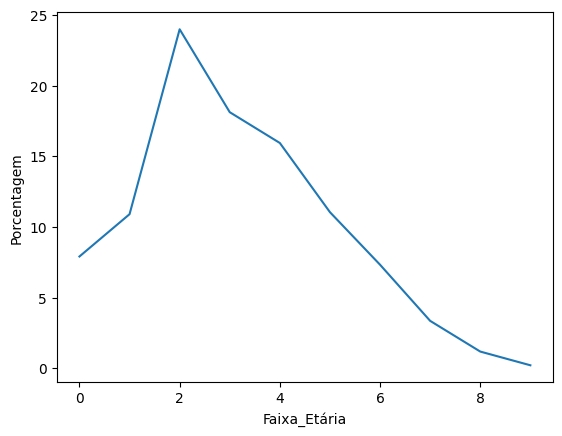

In [7]:
porcent_p.plot(xlabel='Faixa_Etária', ylabel='Porcentagem')

<Axes: title={'center': 'Vacinas 1ª dose por Raça, em porcentagem'}>

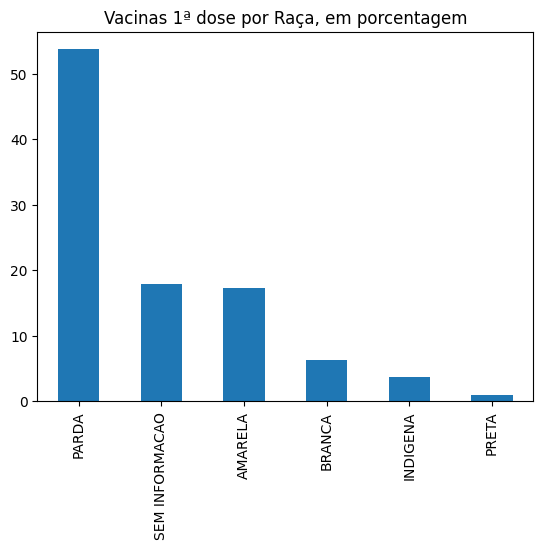

In [8]:
# Quantidade de aplicações de 1ª dose da vacina por Raça, em porcentagem
raça = dados_2.paciente_racaCor_valor.value_counts(normalize=True)
tt_raça = raça.sum()
porcent_raça = (raça/tt_raça)*100
porcent_raça.plot(kind='bar', title='Vacinas 1ª dose por Raça, em porcentagem', ylabel='')

In [9]:
# Quantidade de aplicações de 1ª dose da vacina por sexo, em porcentagem
sexo = dados_2.paciente_enumSexoBiologico.value_counts(normalize=True)
sexo*100

F    52.401709
M    47.597964
I     0.000327
Name: paciente_enumSexoBiologico, dtype: float64

In [10]:
# Quantidade de aplicações de 1ª dose da vacina por Município, em porcentagem
tt_munic = dados_2.paciente_endereco_nmMunicipio.value_counts()
tt_pac = tt_munic.sum()
porcent_munic = (tt_munic/tt_pac)*100
porcent_munic.head()

MANAUS         52.441911
PARINTINS       3.083459
ITACOATIARA     2.949604
MANACAPURU      2.448183
TEFE            2.109666
Name: paciente_endereco_nmMunicipio, dtype: float64

In [11]:
# Quantidade total de aplicação da 1ª dose da vacina por população de risco, em porcentagem
pop_risco = dados_2.vacina_categoria_nome.value_counts()
tt_cat = pop_risco.sum()
porcent_pop_risco = (pop_risco/tt_cat)*100
porcent_pop_risco = round(porcent_pop_risco, 2)
porcent_pop_risco

Faixa Etária                                       74.78
Povos e Comunidades Tradicionais                    6.71
Comorbidades                                        5.44
Trabalhadores de Saúde                              4.89
Povos Indígenas                                     3.61
Trabalhadores da Educação                           2.19
Gestantes                                           0.51
Forças de Segurança e Salvamento                    0.35
Forças Armadas (membros ativos)                     0.32
População Privada de Liberdade                      0.20
Trabalhadores de Transporte                         0.19
Pessoas com Deficiência                             0.18
Outros                                              0.17
Puérperas                                           0.15
Trabalhadores Portuários                            0.12
Pessoas de 60 anos ou mais institucionalizadas      0.05
Trabalhadores de Limpeza Urbana                     0.05
Funcionário do Sistema de Priva